# House Sales in King County, USA #

### This notebook displays Data Analysis skills using Python and its libraries.

In [86]:
# import pandas, numpy, matplotlib and scikitlearn libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

#create variable containing file path
path = r"C:\Users\melac\Desktop\Practice\SQL Databases\CSV Files\kc_house_data.csv"
#read csv
df = pd.read_csv(path)

### Question 1
##### Display the data types of each column using the attribute dtypes. 

In [87]:
#print data types in the dataset
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


### Question 2 
##### Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data.

In [88]:
#drop the columns named 'id' and the unnamed column
df.drop(['id'], axis=1, inplace=True)
#show count, mean, standard deviation, minimum and maximum values and percentile values
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Question 3 
##### Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe. 

In [89]:
#count the number of homes and how many floors they have
floors = df['floors'].value_counts()
floors.to_frame(name='Number of Homes with Floors')

,Number of Homes with Floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4 
##### Use the function boxplot in the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers. 

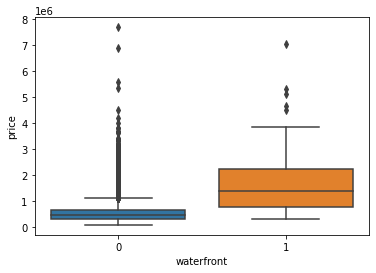

In [90]:
#create a boxplot and display it
sns.boxplot(y=df['price'], x=df['waterfront'])
plt.show()

### Question 5
##### Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

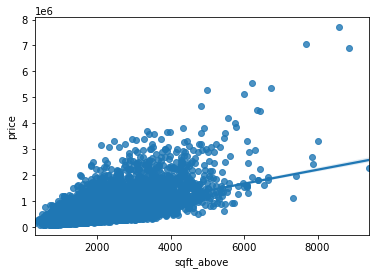

In [91]:
#create a scatterplot and display it
sns.regplot(y=df['price'], x=df['sqft_above'])
plt.show()

### Question 6 
##### Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2.

In [92]:
#fit a linear regression model and calculate the score of R^2
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.4928532179037931

### Question 7 
##### Fit a linear regression model to predict the 'price' using the list of features: 
##### "floors"
##### "waterfront"
##### "lat"
##### "bedrooms"
##### "sqft_basement"
##### "view"
##### "bathrooms"
##### "sqft_living15"
##### "sqft_above"
##### "grade"
##### "sqft_living"

##### Then calculate the R^2.

In [93]:
#declare the columns needed for the model
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

In [94]:
#fit the data to the model and calculate R^2
X = features
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.6577151058279321

### Question 8 
##### Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2.

In [95]:
#create input for pipeline object to scale, transform and fit the data
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [107]:
#create pipeline object, fit it using the data and calculate the R^2
pipeline = Pipeline(Input)
features = features.astype(float)
pipeline.fit(features, Y)
pipeline.score(features, Y)

0.7513473672052319

### Question 9 
##### Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data.

In [97]:
#import modules needed
from sklearn.model_selection import train_test_split

In [98]:
#declare variables for training and testing
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]  
X = features
Y = df['price']

#split training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [99]:
#import Ridge to create a Ridge regression object
from sklearn.linear_model import Ridge

In [103]:
#create ridge model and fit the data, then find the R^2 value
RidgeModel=Ridge(alpha=1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test, y_test)

0.6479695551944303

### Question 10 
##### Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided.

In [104]:
#create a pil
pr = PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

RidgeModel=Ridge(alpha=1)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)

0.6998349505672812